## Agglomerative Clustering

https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 

%matplotlib inline

In [34]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [35]:
dataset = pd.read_csv("drone_delivery.csv", sep=";")
dataset.head()

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298


In [36]:
df = dataset.iloc[:,1:3]
df.head()

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298


In [37]:
colnames = df.columns
colnames

Index(['x', 'y'], dtype='object')

In [38]:
X = df.values

In [39]:
# # Scaling the data so that all the features become comparable 
# scaler = StandardScaler() 
# X_scaled = scaler.fit_transform(df) 
  
# # Normalizing the data so that the data approximately  
# # follows a Gaussian distribution 
# X_normalized = normalize(X_scaled) 
  
# # Converting the numpy array into a pandas DataFrame 
# X_normalized = pd.DataFrame(X_normalized) 

In [40]:
# pca = PCA(n_components = 2) 
# X_principal = pca.fit_transform(X_normalized) 
# X_principal = pd.DataFrame(X_principal) 
# X_principal.columns = ['x', 'y'] 

In [41]:
# X_principal

The Optimal k-arvo on 2

In [42]:
# plt.figure(figsize =(8, 8)) 
# plt.title('Visualising the data') 
# Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

In [43]:
k = 6
clustering = AgglomerativeClustering(n_clusters=k).fit(X)


In [44]:
cluster_labels = clustering.labels_

In [45]:
df['cluster6'] = cluster_labels

In [46]:
df

,x,y,cluster6
0,622.771572,164.857623,3
1,416.357298,630.193634,1
2,292.735020,567.333231,1
3,737.211288,166.225676,3
4,540.475375,682.912298,4
...,...,...,...
5951,832.857394,616.861410,2
5952,242.734500,490.325092,1
5953,108.690847,758.833921,1
5954,803.251074,430.740623,2


<Axes: xlabel='x', ylabel='y'>

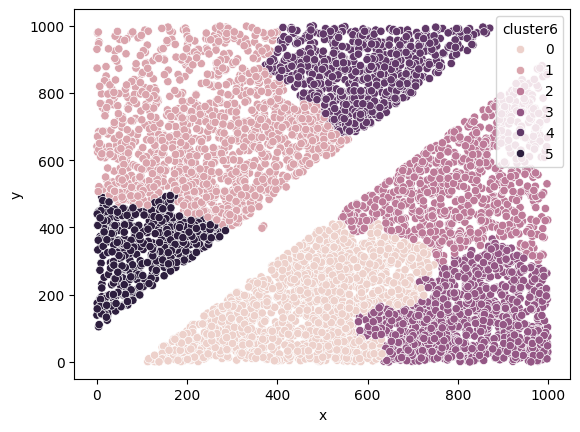

In [47]:
import seaborn as sns
sns.scatterplot(data = df, x = "x", y= "y", hue="cluster6")

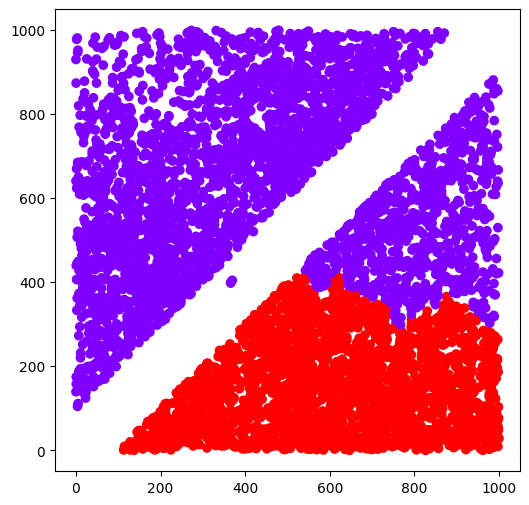

In [48]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(df['x'], df['y'],  
           c = ac2.fit_predict(X), cmap ='rainbow') 
plt.show() 

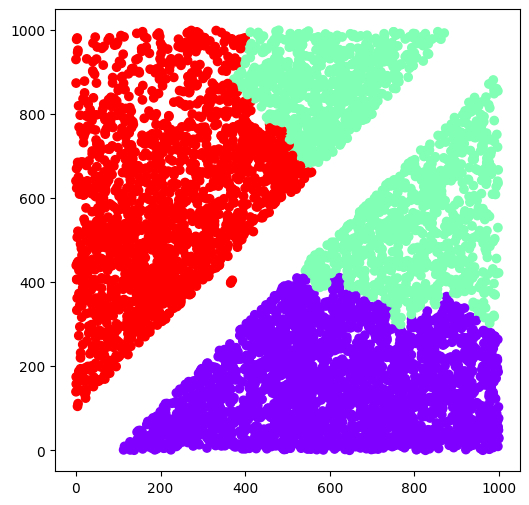

In [49]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(df['x'], df['y'],  
           c = ac3.fit_predict(X), cmap ='rainbow') 
plt.show() 

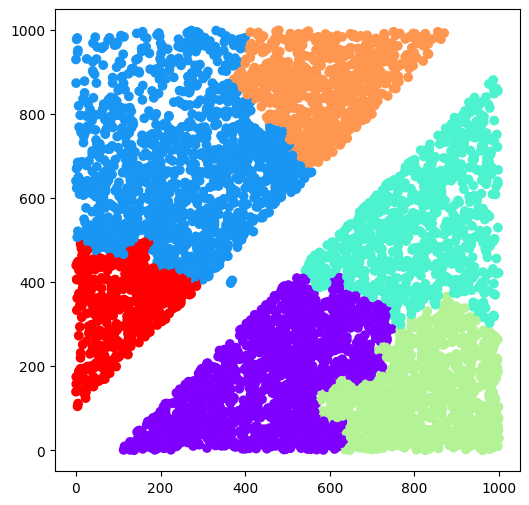

In [50]:
ac6 = AgglomerativeClustering(n_clusters = 6) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(df['x'], df['y'],  
           c = ac6.fit_predict(X), cmap ='rainbow') 
plt.show() 

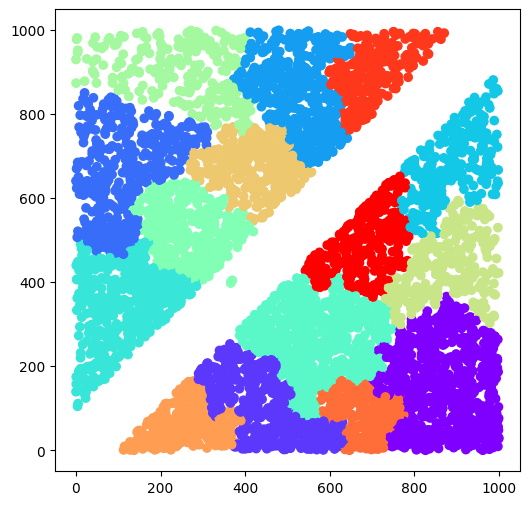

In [51]:
ac15 = AgglomerativeClustering(n_clusters = 15) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(df['x'], df['y'],  
           c = ac15.fit_predict(X), cmap ='rainbow') 
plt.show() 

In [56]:
## menetelmien kuluttama aika
from sklearn.cluster import KMeans
import timeit

def timetest(n_clusters):
    n = 2 # montako kertaa loopataan metodia

    start_time = timeit.default_timer()
    for i in range(n): cluster = KMeans(n_clusters).fit(X)
    kmean_time = timeit.default_timer() - start_time

    start_time = timeit.default_timer()
    for i in range(n): cluster = AgglomerativeClustering(n_clusters).fit(X)
    agg_time = timeit.default_timer() - start_time

    print("n_clust: ",n_clusters, " kmean: ",kmean_time," agg: ",agg_time)

for i in range(2,8): timetest(i)

n_clust:  2  kmean:  0.08444159999999101  agg:  1.4295902000012575
n_clust:  3  kmean:  0.007410299998809933  agg:  1.4143008000010013
n_clust:  4  kmean:  0.010963700000502286  agg:  1.5051978000010422
n_clust:  5  kmean:  0.012759699999151053  agg:  1.448681600000782
n_clust:  6  kmean:  0.00884810000025027  agg:  1.4608860999996978
n_clust:  7  kmean:  0.011470499999632011  agg:  1.4273169999996753
